## Modeling - InceptionV3 with 10 Categories
- Trained the the top 2 modules of InceptionV3 Model on the data set 
- Image Generator from Keras
- Uses flow from directory to tackle memory issues. It overcomes these issues as it carries out pre-processing on each image from the directory as it trains or validates the model. It and doesn't save the pre-processed image into a matrix.  
  
### Approach:
    1. Selected the top 10 classes with highest number of samples
    2. Balanced the top 10 classes 
    3. Used Image Generator to carry out additional pre-processing steps
    4. Modeling: Checked accuracies with InceptionV3 Model and decreasing learning rates
       - Model 1: 
           - ReduceLROnPlateau(factor=.5,patience=3)
           - Accuracy 55.5%, Top 3 84.2%
       - Model 2: 
           - ReduceLROnPlateau(factor=.2, patience=1, verbose=1)
           - Accuracy 40.45%, Top 3 71.2%
       

In [1]:
! pip install theano

In [1]:
import pandas as pd

In [2]:
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
#import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import keras.backend as K

In [4]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 40)
pd.set_option('display.precision', 3)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
import ipywidgets as widgets # Loads the Widget framework.
from IPython.core.magics.namespace import NamespaceMagics # Used to query namespace.

# For this example, hide these names, just to avoid polluting the namespace further
get_ipython().user_ns_hidden['widgets'] = widgets
get_ipython().user_ns_hidden['NamespaceMagics'] = NamespaceMagics

In [7]:
class VariableInspectorWindow(object):
    instance = None

    def __init__(self, ipython):
        """Public constructor."""
        if VariableInspectorWindow.instance is not None:
            raise Exception("""Only one instance of the Variable Inspector can exist at a
                time.  Call close() on the active instance before creating a new instance.
                If you have lost the handle to the active instance, you can re-obtain it
                via `VariableInspectorWindow.instance`.""")

        VariableInspectorWindow.instance = self
        self.closed = False
        self.namespace = NamespaceMagics()
        self.namespace.shell = ipython.kernel.shell

        self._box = widgets.Box()
        self._box.layout.overflow_y = 'scroll'
        self._table = widgets.HTML(value = 'Not hooked')
        self._box.children = [self._table]

        self._ipython = ipython
        self._ipython.events.register('post_run_cell', self._fill)

    def close(self):
        """Close and remove hooks."""
        if not self.closed:
            self._ipython.events.unregister('post_run_cell', self._fill)
            self._box.close()
            self.closed = True
            VariableInspectorWindow.instance = None

    def _fill(self):
        """Fill self with variable information."""
        values = self.namespace.who_ls()
        self._table.value = '<div class="rendered_html jp-RenderedHTMLCommon"><table><thead><tr><th>Name</th><th>Type</th><th>Value</th></tr></thead><tr><td>' + \
            '</td></tr><tr><td>'.join(['{0}</td><td>{1}</td><td>{2}'.format(v, type(eval(v)).__name__, str(eval(v))) for v in values]) + \
            '</td></tr></table></div>'

    def _ipython_display_(self):
        """Called when display() or pyout is used to display the Variable
        Inspector."""
        self._box._ipython_display_()

In [8]:
inspector = VariableInspectorWindow(get_ipython())
inspector

Box(children=(HTML(value='Not hooked'),), layout=Layout(overflow_y='scroll'))

In [9]:
import pickle 

In [10]:
from PIL import Image, ImageChops

In [11]:
Cat_data = pd.read_csv('/home/ubuntu/data/Anno/category_img.csv', sep=",")

In [12]:
Cat_data

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,3
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,3
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3


In [13]:
Cat_name = pd.read_csv('/home/ubuntu/data/Anno/category_cloth.csv', sep=",") # Add Category names and types using dictionaries

In [14]:
Cat_name

,category_name,category_type,category_label
0,Anorak,1,1
1,Blazer,1,2
2,Blouse,1,3
3,Bomber,1,4
4,Button-Down,1,5
5,Cardigan,1,6
6,Flannel,1,7
7,Halter,1,8
8,Henley,1,9
9,Hoodie,1,10


In [15]:
dict_Cat = Cat_name.set_index('category_label').T.to_dict('list')

In [16]:
dict_Cat

{1: ['Anorak', 1],
 2: ['Blazer', 1],
 3: ['Blouse', 1],
 4: ['Bomber', 1],
 5: ['Button-Down', 1],
 6: ['Cardigan', 1],
 7: ['Flannel', 1],
 8: ['Halter', 1],
 9: ['Henley', 1],
 10: ['Hoodie', 1],
 11: ['Jacket', 1],
 12: ['Jersey', 1],
 13: ['Parka', 1],
 14: ['Peacoat', 1],
 15: ['Poncho', 1],
 16: ['Sweater', 1],
 17: ['Tank', 1],
 18: ['Tee', 1],
 19: ['Top', 1],
 20: ['Turtleneck', 1],
 21: ['Capris', 2],
 22: ['Chinos', 2],
 23: ['Culottes', 2],
 24: ['Cutoffs', 2],
 25: ['Gauchos', 2],
 26: ['Jeans', 2],
 27: ['Jeggings', 2],
 28: ['Jodhpurs', 2],
 29: ['Joggers', 2],
 30: ['Leggings', 2],
 31: ['Sarong', 2],
 32: ['Shorts', 2],
 33: ['Skirt', 2],
 34: ['Sweatpants', 2],
 35: ['Sweatshorts', 2],
 36: ['Trunks', 2],
 37: ['Caftan', 3],
 38: ['Cape', 3],
 39: ['Coat', 3],
 40: ['Coverup', 3],
 41: ['Dress', 3],
 42: ['Jumpsuit', 3],
 43: ['Kaftan', 3],
 44: ['Kimono', 3],
 45: ['Nightdress', 3],
 46: ['Onesie', 3],
 47: ['Robe', 3],
 48: ['Romper', 3],
 49: ['Shirtdress', 3],
 5

In [17]:
Cat_data.columns

Index(['image_name', 'category_label'], dtype='object')


# ---> Start Running from here incase instance restarted

In [18]:
with open("../data/Full_df.pkl", 'rb') as picklefile: 
    Full_df = pickle.load(picklefile)

In [19]:
Full_df.head(5)

,image_name,category_label,category_name,category_type,Process_Files
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...


#### Check category type & counts

Categories ---> 1 to 48

In [20]:
Full_df[Full_df['category_label']==48].category_name.unique()

array(['Romper'], dtype=object)

In [21]:
Full_df[Full_df['category_label']==41].category_name.count()

72158

## Classes are imbalanced


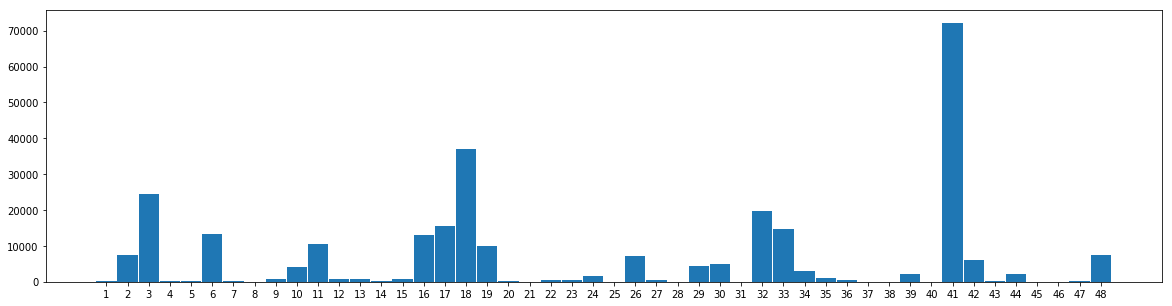

In [22]:
hist, bins = np.histogram(Full_df['category_label'], bins=48)
plt.figure(figsize=(20,5))
width = .98 * (bins[1] - bins[0])
plt.bar(np.arange(1,49), hist, align='center', width=width)
plt.xticks(np.arange(1,49))
plt.show()

Analysis:  
Select 20 categories that have over 2000 examples:  
Categories that are oversampled:    
Categor Name & Label    
Dress - 41
Tee -18
Blouse - 3
Shorts - 32
Tank -17
Skirt - 33
Cardigan - 6
Sweater - 16
Jacket - 11
Top - 19
Blazer -2 
Romper -48
Jeans -26
Jumpsuit -42
Leggings -30
Joggers - 29
Hoodie - 10
Sweatpants -34
Kimono -44
Coat - 39


#### Category Search

In [23]:
Cat_name.iloc[43,:]

category_name     Kimono
category_type          3
category_label        44
Name: 43, dtype: object

Sample Sizes for each Category

In [24]:
Full_df.groupby(['category_label','category_name']).count().sort_values(by=['category_type'],ascending=False)

,,image_name,category_type,Process_Files
category_label,category_name,,,
41,Dress,72158,72158,72158
18,Tee,36887,36887,36887
3,Blouse,24557,24557,24557
32,Shorts,19666,19666,19666
17,Tank,15429,15429,15429
33,Skirt,14773,14773,14773
6,Cardigan,13311,13311,13311
16,Sweater,13123,13123,13123
11,Jacket,10467,10467,10467


In [27]:
Full_df.category_label.value_counts()

41    72158
18    36887
3     24557
32    19666
17    15429
33    14773
6     13311
16    13123
11    10467
19    10078
2      7495
48     7408
26     7076
42     6153
30     5013
29     4416
10     4048
34     3048
44     2294
39     2120
      ...  
27      594
22      527
23      486
36      386
5       330
7       324
4       309
1       160
47      150
20      146
43      126
14       97
21       77
46       70
37       54
25       49
28       45
31       32
8        17
40       17
Name: category_label, Length: 46, dtype: int64

In [28]:
Cat_name

,category_name,category_type,category_label
0,Anorak,1,1
1,Blazer,1,2
2,Blouse,1,3
3,Bomber,1,4
4,Button-Down,1,5
5,Cardigan,1,6
6,Flannel,1,7
7,Halter,1,8
8,Henley,1,9
9,Hoodie,1,10


## Creating a DataFrame with Balanced Classes

In [29]:
from sklearn.utils import resample

In [30]:
#### Creating an empty DF with only 2rows of data....this DF will be concatenated with balanced classes from each class
Df_Bal = Full_df.iloc[:2,:]

In [31]:
Df_Bal

,image_name,category_label,category_name,category_type,Process_Files
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,process_img/Sheer_Pleated-Front_Blouse/img_000...


In [32]:
Full_df.category_label.value_counts().median()

769.5

In [44]:
Full_df.category_label.unique()

array([ 3,  2,  5,  4,  1, 18, 17, 19, 16,  7, 10,  6, 11,  9, 15, 12, 20,
       13, 14,  8, 33, 32, 26, 29, 34, 27, 24, 35, 30, 23, 22, 36, 31, 25,
       28, 21, 41, 48, 39, 44, 42, 47, 37, 43, 40, 46])

In [33]:
# if sample less than 400  then drop class
# if sample less than 1000  then upsample with replacement else downnsample without replacement

for i in Full_df.category_label.unique():
    class_size=Full_df.loc[(Full_df['category_label']== i)].category_label.count()
    print(i,class_size)
    if  class_size < 1000 and class_size >= 400:
        print('L',i,class_size)
        DF_i = resample(Full_df.loc[(Full_df['category_label']== i)],replace=True, n_samples=1000, random_state=42)
        #print(len(DF_i))   
        Df_Bal = pd.concat([Df_Bal, DF_i])
    if class_size >= 1000:
        DF_i = resample(Full_df.loc[(Full_df['category_label']== i)],replace=False, n_samples=1000, random_state=42)
        print('H',i,class_size)
        #print(len(DF_i))
        Df_Bal = pd.concat([Df_Bal, DF_i])
        
    
   # print((Df_Bal.category_label.value_counts()))
    


3 24557
H 3 24557
2 7495
H 2 7495
5 330
4 309
1 160
18 36887
H 18 36887
17 15429
H 17 15429
19 10078
H 19 10078
16 13123
H 16 13123
7 324
10 4048
H 10 4048
6 13311
H 6 13311
11 10467
H 11 10467
9 716
L 9 716
15 791
L 15 791
12 748
L 12 748
20 146
13 676
L 13 676
14 97
8 17
33 14773
H 33 14773
32 19666
H 32 19666
26 7076
H 26 7076
29 4416
H 29 4416
34 3048
H 34 3048
27 594
L 27 594
24 1669
H 24 1669
35 1106
H 35 1106
30 5013
H 30 5013
23 486
L 23 486
22 527
L 22 527
36 386
31 32
25 49
28 45
21 77
41 72158
H 41 72158
48 7408
H 48 7408
39 2120
H 39 2120
44 2294
H 44 2294
42 6153
H 42 6153
47 150
37 54
43 126
40 17
46 70


In [34]:
del(DF_i)

In [35]:

Df_Bal.category_label.nunique()

29

In [36]:
Df_Bal.category_label.value_counts()

3     1002
15    1000
23    1000
32    1000
48    1000
17    1000
33    1000
2     1000
18    1000
34    1000
19    1000
35    1000
6     1000
22    1000
39    1000
30    1000
24    1000
9     1000
41    1000
10    1000
26    1000
42    1000
11    1000
27    1000
12    1000
44    1000
13    1000
29    1000
16    1000
Name: category_label, dtype: int64

In [37]:
a = list(Df_Bal.category_label.unique())
a

[3,
 2,
 18,
 17,
 19,
 16,
 10,
 6,
 11,
 9,
 15,
 12,
 13,
 33,
 32,
 26,
 29,
 34,
 27,
 24,
 35,
 30,
 23,
 22,
 41,
 48,
 39,
 44,
 42]

In [38]:
b= list(Df_Bal.category_name.unique())
b

['Blouse',
 'Blazer',
 'Tee',
 'Tank',
 'Top',
 'Sweater',
 'Hoodie',
 'Cardigan',
 'Jacket',
 'Henley',
 'Poncho',
 'Jersey',
 'Parka',
 'Skirt',
 'Shorts',
 'Jeans',
 'Joggers',
 'Sweatpants',
 'Jeggings',
 'Cutoffs',
 'Sweatshorts',
 'Leggings',
 'Culottes',
 'Chinos',
 'Dress',
 'Romper',
 'Coat',
 'Kimono',
 'Jumpsuit']

In [39]:
c =list(zip(a,b))
print(c)

[(3, 'Blouse'), (2, 'Blazer'), (18, 'Tee'), (17, 'Tank'), (19, 'Top'), (16, 'Sweater'), (10, 'Hoodie'), (6, 'Cardigan'), (11, 'Jacket'), (9, 'Henley'), (15, 'Poncho'), (12, 'Jersey'), (13, 'Parka'), (33, 'Skirt'), (32, 'Shorts'), (26, 'Jeans'), (29, 'Joggers'), (34, 'Sweatpants'), (27, 'Jeggings'), (24, 'Cutoffs'), (35, 'Sweatshorts'), (30, 'Leggings'), (23, 'Culottes'), (22, 'Chinos'), (41, 'Dress'), (48, 'Romper'), (39, 'Coat'), (44, 'Kimono'), (42, 'Jumpsuit')]



41    72158
18    36887
3     24557
32    19666
17    15429
33    14773
6     13311
16    13123
11    10467
19    10078

(41, 'Dress'),(18, 'Tee'),(3, 'Blouse'),(32, 'Shorts'),(17, 'Tank'),(33, 'Skirt'),(6, 'Cardigan'), (16, 'Sweater')
, (11, 'Jacket'), (19, 'Top')

In [43]:
small_list  =[(3, 'Blouse'), (17, 'Tank'), (16, 'Sweater'), 
              (33, 'Skirt'), (32, 'Shorts'), (26, 'Jeans'), 
              (30, 'Leggings'), (41, 'Dress'),  (39, 'Coat'), (42, 'Jumpsuit')]

In [44]:
len(small_list)

10

In [47]:
Small = []
for i in small_list:
    Small.append(i[1])
print(Small)

['Blouse', 'Tank', 'Sweater', 'Skirt', 'Shorts', 'Jeans', 'Leggings', 'Dress', 'Coat', 'Jumpsuit']


In [40]:
del Full_df

## Initial analysis on 10k samples

#### Acquiring a samle of 10K from the full dataset

In [48]:
%%time
# grab a fixed number of examples
num_ex = 10000  
include_categories = ['Blouse', 'Tank', 'Sweater', 'Skirt', 'Shorts', 'Jeans', 'Leggings', 'Dress', 'Coat', 'Jumpsuit']
small_bool = Df_Bal.category_name.isin(include_categories)
num_ex = min(num_ex, sum(small_bool))
small_data = Df_Bal[Df_Bal.category_name.isin(include_categories)].sample(num_ex) #making new df, small_data with 30k exapmles
#making a dict with category_name as key and its index in list category_name as the value/label indiex
label_dict = dict(zip(include_categories, range(len(include_categories))))
print(label_dict)
small_data["label_i"] = small_data.category_name.map(label_dict) #creating a column in df with label index from dic
y = small_data.label_i.as_matrix() #creating y (target/label) to be redicted 


{'Jeans': 5, 'Sweater': 2, 'Tank': 1, 'Shorts': 4, 'Skirt': 3, 'Coat': 8, 'Blouse': 0, 'Leggings': 6, 'Dress': 7, 'Jumpsuit': 9}
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 14.4 ms


In [49]:
del(Df_Bal)

#### Frequency of the different Categories in  the 10K Examples

In [50]:
small_data.category_name.value_counts()

Blouse      1001
Dress       1000
Tank        1000
Shorts      1000
Jumpsuit    1000
Skirt       1000
Sweater     1000
Leggings    1000
Coat        1000
Jeans        999
Name: category_name, dtype: int64

In [51]:
small_data.label_i.value_counts()

0    1001
7    1000
6    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
5     999
Name: label_i, dtype: int64

In [52]:
label_dict

{'Blouse': 0,
 'Coat': 8,
 'Dress': 7,
 'Jeans': 5,
 'Jumpsuit': 9,
 'Leggings': 6,
 'Shorts': 4,
 'Skirt': 3,
 'Sweater': 2,
 'Tank': 1}

In [53]:
y.shape

(10000,)

In [54]:
y[:5]

array([7, 0, 4, 6, 3])

In [55]:
small_data.head().T

,272585,14619,151906,168021,180439
image_name,img/Paint_It_Red_Morning_Petal_Dress/img_00000...,img/Crochet-Trimmed_Rose_Print_Blouse/img_0000...,img/Belted_Chino_Shorts/img_00000030.jpg,img/Heathered_Stripe-Waist_Capri_Leggings/img_...,img/Pleated_Floral_Chiffon_Skirt/img_00000033.jpg
category_label,41,3,32,30,33
category_name,Dress,Blouse,Shorts,Leggings,Skirt
category_type,3,1,2,2,2
Process_Files,process_img/Paint_It_Red_Morning_Petal_Dress/i...,process_img/Crochet-Trimmed_Rose_Print_Blouse/...,process_img/Belted_Chino_Shorts/img_00000030.jpg,process_img/Heathered_Stripe-Waist_Capri_Leggi...,process_img/Pleated_Floral_Chiffon_Skirt/img_0...
label_i,7,0,4,6,3


In [56]:
y[-5:]

array([8, 5, 2, 0, 2])

In [57]:
small_data.tail().T

,199265,198609,77540,12842,44237
image_name,img/Open-Front_Duster_Coat/img_00000048.jpg,img/Destroyed_Cropped_Jeans/img_00000031.jpg,img/Cropped_Purl_Knit_Sweater/img_00000015.jpg,img/Contrast-Piped_Blouse/img_00000038.jpg,img/Striped_Metallic-Woven_Sweater/img_0000004...
category_label,39,26,16,3,16
category_name,Coat,Jeans,Sweater,Blouse,Sweater
category_type,3,2,1,1,1
Process_Files,process_img/Open-Front_Duster_Coat/img_0000004...,process_img/Destroyed_Cropped_Jeans/img_000000...,process_img/Cropped_Purl_Knit_Sweater/img_0000...,process_img/Contrast-Piped_Blouse/img_00000038...,process_img/Striped_Metallic-Woven_Sweater/img...
label_i,8,5,2,0,2


In [58]:
len(small_data)

10000

In [59]:
small_data.tail()

,image_name,category_label,category_name,category_type,Process_Files,label_i
199265,img/Open-Front_Duster_Coat/img_00000048.jpg,39,Coat,3,process_img/Open-Front_Duster_Coat/img_0000004...,8
198609,img/Destroyed_Cropped_Jeans/img_00000031.jpg,26,Jeans,2,process_img/Destroyed_Cropped_Jeans/img_000000...,5
77540,img/Cropped_Purl_Knit_Sweater/img_00000015.jpg,16,Sweater,1,process_img/Cropped_Purl_Knit_Sweater/img_0000...,2
12842,img/Contrast-Piped_Blouse/img_00000038.jpg,3,Blouse,1,process_img/Contrast-Piped_Blouse/img_00000038...,0
44237,img/Striped_Metallic-Woven_Sweater/img_0000004...,16,Sweater,1,process_img/Striped_Metallic-Woven_Sweater/img...,2


#### Not USed ----> Saving the 10k images into a new folder called 'small_img_set'


In [72]:
#create folder 
os.makedirs('/home/ubuntu/data/Categories_10')

In [73]:
#create folder 
os.makedirs('/home/ubuntu/data/Categories_10/small_img_set')

In [78]:
path4 = '/home/ubuntu/data/Categories_10/small_img_set/'

In [79]:
filepaths=list(small_data.Process_Files)
filepaths

['process_img/Paint_It_Red_Morning_Petal_Dress/img_00000002.jpg',
 'process_img/Crochet-Trimmed_Rose_Print_Blouse/img_00000035.jpg',
 'process_img/Belted_Chino_Shorts/img_00000030.jpg',
 'process_img/Heathered_Stripe-Waist_Capri_Leggings/img_00000003.jpg',
 'process_img/Pleated_Floral_Chiffon_Skirt/img_00000033.jpg',
 'process_img/Oversized_High-Neck_Sweater/img_00000058.jpg',
 'process_img/Boxy_Ribbed_Knit_Tank/img_00000041.jpg',
 'process_img/Heathered_Yoga_Capri_Leggings/img_00000011.jpg',
 'process_img/Zippered_Colorblock_Crepe_Jumpsuit/img_00000022.jpg',
 'process_img/Lace_Pencil_Skirt/img_00000060.jpg',
 'process_img/Fuzzy_Marled_Knit_Sweater/img_00000010.jpg',
 'process_img/Spotted_Rose_Bodycon_Dress/img_00000003.jpg',
 'process_img/Cinched_Ankle_Jeans/img_00000044.jpg',
 'process_img/Open-Front_Coat/img_00000031.jpg',
 'process_img/Floral_Print_Knit_Tank/img_00000046.jpg',
 'process_img/Nubby_Knit_Sweater/img_00000030.jpg',
 'process_img/Cinched_Ankle_Jeans/img_00000058.jpg',
 

In [80]:
# Creating all the new folders inside 'small_img_set'

for old in filepaths:
    newfolder =old.split('/')[-2]
    newfolder = path4  + newfolder
    print(newfolder)
    if not os.path.exists(newfolder):
        os.makedirs(newfolder)

/home/ubuntu/data/Categories_10/small_img_set/Paint_It_Red_Morning_Petal_Dress
/home/ubuntu/data/Categories_10/small_img_set/Crochet-Trimmed_Rose_Print_Blouse
/home/ubuntu/data/Categories_10/small_img_set/Belted_Chino_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Heathered_Stripe-Waist_Capri_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Pleated_Floral_Chiffon_Skirt
/home/ubuntu/data/Categories_10/small_img_set/Oversized_High-Neck_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Boxy_Ribbed_Knit_Tank
/home/ubuntu/data/Categories_10/small_img_set/Heathered_Yoga_Capri_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Zippered_Colorblock_Crepe_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Lace_Pencil_Skirt
/home/ubuntu/data/Categories_10/small_img_set/Fuzzy_Marled_Knit_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Spotted_Rose_Bodycon_Dress
/home/ubuntu/data/Categories_10/small_img_set/Cinched_Ankle_Jeans
/home/ubuntu/data/Categories_10/small_img_

/home/ubuntu/data/Categories_10/small_img_set/Drawstring_Waist_Trench_Coat
/home/ubuntu/data/Categories_10/small_img_set/Fit_&_Flare_Crisscross_Cami_Dress
/home/ubuntu/data/Categories_10/small_img_set/Dotted_Clean_Wash_-_Skinny_Jeans
/home/ubuntu/data/Categories_10/small_img_set/Abstract_Tribal_Print_Halter_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Slub_Knit_Buttoned-Back_Blouse
/home/ubuntu/data/Categories_10/small_img_set/Classic_Distressed_Boyfriend_Jeans
/home/ubuntu/data/Categories_10/small_img_set/Performance_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Lace_Patterned_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Distressed_Cropped_Jeans
/home/ubuntu/data/Categories_10/small_img_set/Textured_Damask_Bodycon_Dress
/home/ubuntu/data/Categories_10/small_img_set/Kimono-Sleeved_Paisley_Blouse
/home/ubuntu/data/Categories_10/small_img_set/Mineral_Wash_Boyfriend_Jeans
/home/ubuntu/data/Categories_10/small_img_set/Strapless_Metallic_Bandage_Dress
/home/ubuntu/

/home/ubuntu/data/Categories_10/small_img_set/Mineral_Wash_High-Rise_Skinny_Jeans
/home/ubuntu/data/Categories_10/small_img_set/Open_Back_Mesh-Paneled_Tank
/home/ubuntu/data/Categories_10/small_img_set/Trimmed_Pocket_Tank
/home/ubuntu/data/Categories_10/small_img_set/Triangle-Patterned_Sequin_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Crochet-Patch_Boyfriend_Jeans
/home/ubuntu/data/Categories_10/small_img_set/Whiskered_Skinny_Jeans
/home/ubuntu/data/Categories_10/small_img_set/Colorblock_Performance_Capri_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Anchor_Print_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Fringed_Tie-Dye_Racerback_Tank
/home/ubuntu/data/Categories_10/small_img_set/Classic_Hooded_Duffle_Coat
/home/ubuntu/data/Categories_10/small_img_set/Textured_Midi_Skirt
/home/ubuntu/data/Categories_10/small_img_set/Abstract_Organza_A-Line_Skirt
/home/ubuntu/data/Categories_10/small_img_set/Abstract_Print_Workout_Leggings
/home/ubuntu/data/Categories_10/sm

/home/ubuntu/data/Categories_10/small_img_set/Semi-Sheer_Racerback_Tank
/home/ubuntu/data/Categories_10/small_img_set/Retro_Floral_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Ruffled_Lace-Up_Blouse
/home/ubuntu/data/Categories_10/small_img_set/Belted_Trench_Coat
/home/ubuntu/data/Categories_10/small_img_set/Boxy_Chiffon_Pocket_Blouse
/home/ubuntu/data/Categories_10/small_img_set/Pleated_Pinstripe_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Geo_Moment_High-Waisted_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Classic_Skinny_Jeans
/home/ubuntu/data/Categories_10/small_img_set/Snake_Print_Racerback_Tank
/home/ubuntu/data/Categories_10/small_img_set/Zip-Front_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Abstract_Print_Capri_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Young_Romance_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Ditsy_Floral_Print_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Chambray_Jumpsuit
/home/ubuntu/data/

/home/ubuntu/data/Categories_10/small_img_set/Layered-Collar_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Popcorn-Knit_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Colorblock_Performance_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Buttoned_Front_Tank
/home/ubuntu/data/Categories_10/small_img_set/Brushstroke_Stripe_Deep-V_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Abstract_Diamond_Print_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Boxy_Stripe_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Strapless_Paisley_Print_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Tribal-Inspired_Chino_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Damask_Print_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Sunflower_Print_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Heathered_Knit_Coat
/home/ubuntu/data/Categories_10/small_img_set/Double-Breasted_Trench_Coat
/home/ubuntu/data/Categories_10/small_img_set/High_Slit_Midi_Ski

/home/ubuntu/data/Categories_10/small_img_set/Tribal_Print_Surplice_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Poetic_Dream_Crochet_Blouse
/home/ubuntu/data/Categories_10/small_img_set/Tribal_Print_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Polka_Dot_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Striped_Tribal_Print_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Ribbed_Knit_Bodycon_Dress
/home/ubuntu/data/Categories_10/small_img_set/Knife-Pleated_Denim_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Sheer_Sequin_Tank
/home/ubuntu/data/Categories_10/small_img_set/Contrast-Front_Knit_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Distressed_Cropped_Jeans
/home/ubuntu/data/Categories_10/small_img_set/Mid-Rise_-_Zippered_Skinny_Jeans
/home/ubuntu/data/Categories_10/small_img_set/Striped_Crew_Neck_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Cotton_Canvas_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Tribal_Print_Knit_Leggin

/home/ubuntu/data/Categories_10/small_img_set/Boxy_Open-Knit_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Textured_Marled_Knit_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Tasseled_Neckline_Stripe_Blouse
/home/ubuntu/data/Categories_10/small_img_set/Longline_Crochet_Overlay_Dress
/home/ubuntu/data/Categories_10/small_img_set/Chiffon_V-Neck_Blouse
/home/ubuntu/data/Categories_10/small_img_set/Mesh_Tank_Dress
/home/ubuntu/data/Categories_10/small_img_set/Hooded_Purl_Knit_Sweater
/home/ubuntu/data/Categories_10/small_img_set/Soft_Knit_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Embroidered_Crepe_Surplice_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Cap-Sleeved_Lace_Blouse
/home/ubuntu/data/Categories_10/small_img_set/Colorblock_Side_Pocket_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Zippered_Ponte_Knit_Leggings
/home/ubuntu/data/Categories_10/small_img_set/Checkered_Print_Chiffon_Blouse
/home/ubuntu/data/Categories_10/small_img_set/Heather

/home/ubuntu/data/Categories_10/small_img_set/Easy_Chino_Shorts
/home/ubuntu/data/Categories_10/small_img_set/Woven_Trench_Coat
/home/ubuntu/data/Categories_10/small_img_set/Life_In_Progress_Wrap_Belt_Chambray_Dress
/home/ubuntu/data/Categories_10/small_img_set/Side_Vent_Heathered_Tank
/home/ubuntu/data/Categories_10/small_img_set/Married_To_The_Mob_Feminist_Tank
/home/ubuntu/data/Categories_10/small_img_set/Open-Back_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Medallion_Print_Sheath_Dress
/home/ubuntu/data/Categories_10/small_img_set/Cutout_Maxi_Cami_Dress
/home/ubuntu/data/Categories_10/small_img_set/Embroidered_Mesh_Gauze_Blouse
/home/ubuntu/data/Categories_10/small_img_set/Contrast_Mesh_Pencil_Skirt
/home/ubuntu/data/Categories_10/small_img_set/Strapless_Wide-Leg_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Tropical_Print_Tank
/home/ubuntu/data/Categories_10/small_img_set/Pleated_Button-Front_Jumpsuit
/home/ubuntu/data/Categories_10/small_img_set/Pleated_Overal

In [81]:
path3 = '/home/ubuntu/data'

In [82]:
%time

for i, address in enumerate(small_data.Process_Files):
    image = Image.open((path3+'/'+address))
    image.save(path4 + '/' + '/'.join(address.split('/')[-2:]))
    
    
print("Finished")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
Finished


#### Saving the 10k images into a new folder called 'Model_Train_Val_set'

In [84]:
#create folders  and sub directories
os.makedirs('/home/ubuntu/data/Categories_10/Model_Train_Val_set')
os.makedirs('/home/ubuntu/data/Categories_10/Model_Train_Val_set/Train_Set')
os.makedirs('/home/ubuntu/data/Categories_10/Model_Train_Val_set/Test_Set')

In [85]:
#Making 10 category dirs in each of Test and Val dirs

for i in ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']:
    os.makedirs('/home/ubuntu/data/Categories_10/Model_Train_Val_set/Train_Set/Cat'+i)
    os.makedirs('/home/ubuntu/data/Categories_10/Model_Train_Val_set/Test_Set/Cat'+i)

In [86]:
path5 = '/home/ubuntu/data/Categories_10/Model_Train_Val_set/Train_Set'
path6 = '/home/ubuntu/data/Categories_10/Model_Train_Val_set/Test_Set'

In [87]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(small_data, test_size=0.2,stratify= y)

In [88]:
val.shape

(2000, 6)

In [89]:
train.head()

,image_name,category_label,category_name,category_type,Process_Files,label_i
36668,img/Boxy_Slub_Knit_Sweater/img_00000008.jpg,16,Sweater,1,process_img/Boxy_Slub_Knit_Sweater/img_0000000...,2
168977,img/Heathered_High-Waisted_Leggings/img_000000...,30,Leggings,2,process_img/Heathered_High-Waisted_Leggings/im...,6
184120,img/Striped_Seersucker_Shorts/img_00000048.jpg,32,Shorts,2,process_img/Striped_Seersucker_Shorts/img_0000...,4
69338,img/Classic_Slub_Jersey_Tank/img_00000006.jpg,17,Tank,1,process_img/Classic_Slub_Jersey_Tank/img_00000...,1
228446,img/Faux_Leather_Trimmed_Utility_Coat/img_0000...,39,Coat,3,process_img/Faux_Leather_Trimmed_Utility_Coat/...,8


In [90]:
train.shape

(8000, 6)

In [91]:
train.label_i.value_counts()

0    801
7    800
3    800
6    800
2    800
9    800
1    800
8    800
4    800
5    799
Name: label_i, dtype: int64

In [92]:
path3 = '/home/ubuntu/data'
path5

'/home/ubuntu/data/Categories_10/Model_Train_Val_set/Train_Set'

In [93]:
%%time
#Saving Images to Train Set Dir
#train.iloc[i,5] provides the label for each entry...the path in image.save saves in the correct Cat(label) directory

for i, address in enumerate(train.Process_Files):
    image = Image.open((path3+'/'+address))
    if len(str(train.iloc[i,5]))==1:
        image.save(path5 + '/'+ 'Cat0'+str(train.iloc[i,5])+'/'+str('+'.join(address.split('/')[-2:])))
    else:
        image.save(path5 + '/'+ 'Cat'+str(train.iloc[i,5])+'/'+str('+'.join(address.split('/')[-2:])))
        
print("Finished")

Finished
CPU times: user 18.5 s, sys: 460 ms, total: 18.9 s
Wall time: 18.9 s


In [94]:
path6

'/home/ubuntu/data/Categories_10/Model_Train_Val_set/Test_Set'

In [95]:
%%time
#Saving Images to Test Set Dir
#val.iloc[i,5] provides the label for each entry...the path in image.save saves in the correct Cat(label) directory

for i, address in enumerate(val.Process_Files):
    image = Image.open((path3+'/'+address))
    if len(str(val.iloc[i,5]))==1:
        image.save(path6 + '/'+ 'Cat0'+str(val.iloc[i,5])+'/'+str('+'.join(address.split('/')[-2:])))
    else:
        image.save(path6 + '/'+ 'Cat'+str(val.iloc[i,5])+'/'+str('+'.join(address.split('/')[-2:])))
        
print("Finished")

Finished
CPU times: user 4.17 s, sys: 64 ms, total: 4.23 s
Wall time: 4.24 s


#### Pickling DFs small_data, train and val

In [96]:
'''
with open('/home/ubuntu/data/Categories_10/small_data.pkl', 'wb') as picklefile_small_data:
    pickle.dump( small_data, picklefile_small_data, protocol=4)
'''


In [97]:
'''
with open('/home/ubuntu/data/Categories_10/train.pkl', 'wb') as picklefile_train:
    pickle.dump( train, picklefile_train, protocol=4)
'''

In [98]:
'''
with open('/home/ubuntu/data/Categories_10/val.pkl', 'wb') as picklefile_val:
    pickle.dump( val, picklefile_val, protocol=4)
'''

## ----> Start running NB from here

#### Load DFs small_data, train and val

In [19]:
with open('/home/ubuntu/data/Categories_10/small_data.pkl', 'rb') as picklefile_small_data: 
    small_data = pickle.load(picklefile_small_data)

In [20]:
with open('/home/ubuntu/data/Categories_10/train.pkl', 'rb') as picklefile_train:
    train = pickle.load(picklefile_train)

In [21]:
with open('/home/ubuntu/data/Categories_10/val.pkl', 'rb') as picklefile_val:
    val = pickle.load(picklefile_val)

## Model Building


## Model 1 
### InceptionV3
    - ReduceLROnPlateau(factor=.5,patience=3)

In [11]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

In [12]:
import keras
import keras.backend as K
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
#import vis

#### Metrics & Plotting

In [13]:
# Metrics for accuracy - sparse top 3 categorical
#Checks whether y_true matches any of the top3 predictions(Y_preds)/classes with top3 probabilites predicted by model 
#Use Y_pred with probabilitites for each class and not y_pred that gives only a single predicted class corresponding
#to class with highest probability

def top_3(y_true, Y_pred):  
    return keras.metrics.top_k_categorical_accuracy(y_true, Y_pred, k=3)

In [14]:
def plot_confusion(title_plot,y_test, y_pred):
    
    c_mat = confusion_matrix(y_test,y_pred)
    labels = sorted(label_dict.items(),key = lambda x: x[1])# or use---> unique(y_test)
    sns.heatmap(
        sqrt(c_mat),
        annot=np.true_divide(c_mat, c_mat.sum(axis=1, keepdims=True))*100, #annotations on Plot are in % for each row
        cmap= plt.cm.Reds,
        xticklabels=labels,
        yticklabels=labels,
        cbar=True);
    ylabel("True Label", fontsize = 'large',fontweight ='bold' )
    xlabel("Predicted Label", fontsize = 'large',fontweight ='bold' )
    title(title_plot, fontsize = 'xx-large',fontweight ='bold' )

In [15]:
# plots the model's score metrics: loss and accuracy and top k accuracy

def plot_history(history): 
    measures = np.unique([m.replace('val_', '') for m in history.history.keys()])
    num_meas = len(measures)
    x = arange(len(history.history[measures[0]]))
    fix, axes = subplots(nrows=num_meas,ncols=1,squeeze=True, sharex=True,figsize=(6,2*num_meas), tight_layout=True)
    if num_meas == 1:
        axes = [axes]
    for i,meas in enumerate(measures):
        axes[i].plot(x, history.history[meas], label=meas)
        if "val_"+meas in history.history.keys():
            axes[i].plot(x, history.history["val_"+meas], label="val_"+meas)
        axes[i].legend()
        if meas in ["acc", "top_3"]:
            axes[i].set_ylim((-0.01,1.01))
    axes[-1].set_xlabel("epoch");

### Image Generator Pre-processing

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True,
    zca_epsilon=1e-6,
    horizontal_flip=True,
    rotation_range=15,  
    width_shift_range=4/200,
    height_shift_range=4/200,
    fill_mode='constant',
    cval=0.,
    data_format=K.image_data_format()
    )

test_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True,
    zca_epsilon=1e-6)

In [17]:
train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/Categories_10/Model_Train_Val_set/Train_Set',
        target_size=(200, 200), #image width & height
        batch_size=32,
        class_mode='categorical',
        classes=['Cat00', 'Cat01','Cat02','Cat03', 'Cat04', 'Cat05','Cat06', 'Cat07', 'Cat08','Cat09'])

Found 8000 images belonging to 10 classes.


In [22]:
len(train)

8000

In [23]:
train.Process_Files.nunique()

8000

In [24]:
len(val)

2000

In [25]:
val.Process_Files.nunique()

2000

**Note** No. of images are less than the length test and train df as some of the classes with less than 1000 exmaples
were usampled with the same image


In [26]:
validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/Categories_10/Model_Train_Val_set/Test_Set',
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical',
        shuffle= False,
        classes=['Cat00', 'Cat01','Cat02','Cat03', 'Cat04', 'Cat05','Cat06', 'Cat07', 'Cat08','Cat09'])

Found 2000 images belonging to 10 classes.


### Model Architecture

In [27]:
# create the base pre-trained model
base_model_small = InceptionV3(weights='imagenet', include_top=False)

In [28]:
# add a global spatial average pooling layer
x = base_model_small.output
x = GlobalAveragePooling2D()(x)

In [29]:
#Classification Layers
# let's add a fully-connected layer
x = Dropout(.35)(x)
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- 10 classes
x = Dropout(.25)(x)
predictions = Dense(10, activation='softmax')(x)

In [30]:
# this is the model we will train
model_small = Model(inputs=base_model_small.input, outputs=predictions)

In [31]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model_small.layers:
    layer.trainable = False

In [32]:
# compile the model (should be done *after* setting layers to non-trainable)
model_small.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top_3])

In [33]:
model_small.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, None, None, 32 864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, None, None, 32 96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, None, None, 32 0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

## Train Top Layers i.e. Classification Layers

Note: Freeze all the base model layers i.e. the 9 InceptionV3 modules. Train only Classificaition Layer

Epoch 1/100


/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:506: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:514: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:524: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.


250/250 [==============================] - 71s - loss: 2.3165 - acc: 0.2535 - top_3: 0.5339 - val_loss: 1.8116 - val_acc: 0.3375 - val_top_3: 0.6700
Epoch 2/100
250/250 [==============================] - 68s - loss: 1.8605 - acc: 0.3496 - top_3: 0.6581 - val_loss: 1.7654 - val_acc: 0.3725 - val_top_3: 0.6875
Epoch 3/100
250/250 [==============================] - 68s - loss: 1.7933 - acc: 0.3678 - top_3: 0.6759 - val_loss: 1.6474 - val_acc: 0.4230 - val_top_3: 0.7305
Epoch 4/100
250/250 [==============================] - 68s - loss: 1.7357 - acc: 0.3904 - top_3: 0.7056 - val_loss: 1.6492 - val_acc: 0.4175 - val_top_3: 0.7200
Epoch 5/100
250/250 [==============================] - 68s - loss: 1.7141 - acc: 0.4031 - top_3: 0.7147 - val_loss: 1.6096 - val_acc: 0.4460 - val_top_3: 0.7255
Epoch 6/100
250/250 [==============================] - 68s - loss: 1.7083 - acc: 0.4046 - top_3: 0.7120 - val_loss: 1.6838 - val_acc: 0.4060 - val_top_3: 0.7200
Epoch 7/100
249/250 [=========================

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


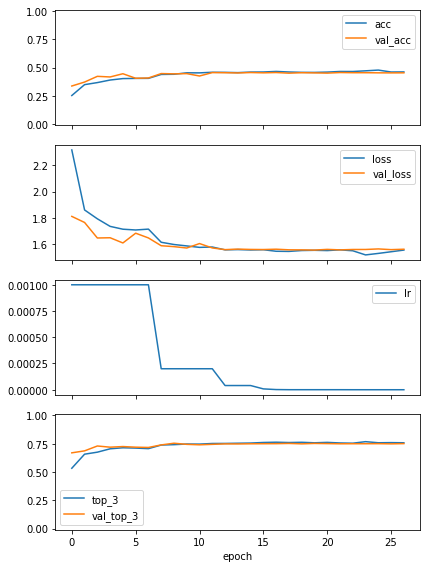

In [38]:

%%time

#old model with less layers architecture..running throuh extra preprocessing steps from directory-- loss starts at 2
hist = model_small.fit_generator(
        train_generator,
        steps_per_epoch=8000/32,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=2000/ 32,
        callbacks=[keras.callbacks.EarlyStopping(patience=6,verbose=1),
        keras.callbacks.ReduceLROnPlateau(factor=.2, patience=1, verbose=1)])
 

plot_history(hist)


In [42]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model_small.layers):
    print(i, layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

## Train the top 2 Modules of InceptionV3

Note: First 249 layers stay frozen, the rest are trained

In [43]:
# we chose to train the top 2 inception blocks, 
# i.e. we will freeze the first 249 layers and unfreeze the rest:
for layer in model_small.layers[:249]:
    layer.trainable = False
for layer in model_small.layers[249:]:
    layer.trainable = True

In [44]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model_small.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy', top_3])

Epoch 1/100


/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:506: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:514: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:524: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.


250/250 [==============================] - 74s - loss: 1.5358 - acc: 0.4657 - top_3: 0.7604 - val_loss: 1.5263 - val_acc: 0.4680 - val_top_3: 0.7585
Epoch 2/100
250/250 [==============================] - 73s - loss: 1.4955 - acc: 0.4910 - top_3: 0.7767 - val_loss: 1.4968 - val_acc: 0.4850 - val_top_3: 0.7680
Epoch 3/100
250/250 [==============================] - 73s - loss: 1.4686 - acc: 0.4894 - top_3: 0.7879 - val_loss: 1.4732 - val_acc: 0.4835 - val_top_3: 0.7730
Epoch 4/100
250/250 [==============================] - 73s - loss: 1.4324 - acc: 0.5024 - top_3: 0.7951 - val_loss: 1.4514 - val_acc: 0.4925 - val_top_3: 0.7755
Epoch 5/100
250/250 [==============================] - 73s - loss: 1.4059 - acc: 0.5089 - top_3: 0.8017 - val_loss: 1.4320 - val_acc: 0.5000 - val_top_3: 0.7850
Epoch 6/100
250/250 [==============================] - 73s - loss: 1.4004 - acc: 0.5206 - top_3: 0.8021 - val_loss: 1.4133 - val_acc: 0.5085 - val_top_3: 0.7890
Epoch 7/100
250/250 [=========================

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


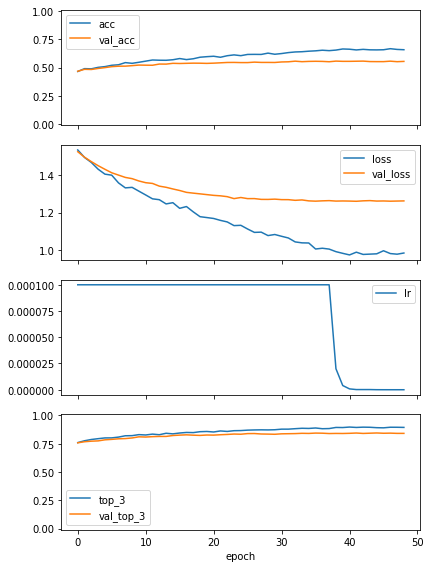

In [46]:

%%time
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
hist2 = model_small.fit_generator(train_generator,
        steps_per_epoch=8000/32,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=2000/ 32,
        callbacks=[keras.callbacks.EarlyStopping(patience=6,verbose=1),
        keras.callbacks.ReduceLROnPlateau(factor=.2, patience=1, verbose=1)]) #factor=.2, patience=1, verbose=1


plot_history(hist2)


### Save Model

In [47]:
from keras.models import load_model

In [48]:
'''
model_small.save('/home/ubuntu/data/Categories_10/modelInception_Small10.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
'''


In [49]:
# returns a compiled model
# identical to the previous one
model_small = load_model('/home/ubuntu/data/Categories_10/modelInception_Small10.h5',\
                    custom_objects={'top_3': top_3})

## Predicted Y  label

#### Model Predicted probabilities for the 10 classes  and Highest Predicted Class for each example

**Important Note:**  Make validation_generator's shuffle argument False but keep the train_generator Shuffle as false

### ---> Change  the steps denominator to actual no. of images in validation set

In [82]:
%%time

predictions_class_prob= model_small.predict_generator(validation_generator, max_queue_size=1, steps=2000/32)


/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:506: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:514: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:524: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.


CPU times: user 15.5 s, sys: 616 ms, total: 16.1 s
Wall time: 13 s


In [76]:

with open('/home/ubuntu/data/Categories_10/predictions_10.pkl', 'wb') as picklefile_predictions_10:
    pickle.dump( predictions_class_prob, picklefile_predictions_10, protocol=4)


In [ ]:

with open('/home/ubuntu/data/Categories_10/predictions_10.pkl', 'rb') as picklefile_predictions_10:
    predictions_class_prob = pickle.load(picklefile_predictions_10)
'

In [49]:
print('Probabilities for each class:\n')
predictions_class_prob

Probabilities for each class:



array([[  9.14281383e-02,   5.36470488e-02,   3.80513608e-01, ...,
          2.52190424e-04,   7.59767543e-04,   8.62660706e-02],
       [  1.03331715e-01,   1.99829325e-01,   1.55779868e-01, ...,
          3.15107666e-02,   1.80209428e-01,   6.37771562e-02],
       [  9.20119137e-02,   1.35094687e-01,   3.03092953e-02, ...,
          2.15188414e-01,   1.08031169e-01,   1.45606801e-01],
       ..., 
       [  1.16078839e-01,   2.38088313e-02,   4.03613783e-03, ...,
          1.07508205e-01,   2.05255091e-01,   1.71748042e-01],
       [  5.75170100e-01,   2.46331841e-02,   4.57967035e-02, ...,
          4.50349748e-02,   1.27124354e-01,   8.32189023e-02],
       [  3.82193175e-05,   1.51529293e-05,   5.21237089e-04, ...,
          2.48925993e-04,   9.97408569e-01,   1.23525506e-05]], dtype=float32)

In [83]:
# Class with highest predicted probability for each example
y_pred = np.argmax(predictions_class_prob, axis=1)

In [84]:
print('Predicted Labels:\n')
y_pred

Predicted Labels:



array([1, 1, 1, ..., 1, 4, 1])

### -----> Issue finding True y label

validation_generator.classes does print the True labels but in the order that they are retrieved from the directory, it doesn't take into account the batching or sample expansion by augmentation.
https://q-a-assistant.info/computer-internet-technology/keras-get-true-labels-y-test-from-imagedatagenerator-or-predict-generator/1165857

In [54]:
y_true = validation_generator.classes  # True Lable

In [55]:
y_true 

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [56]:
validation_generator.filenames

['Cat00/Contrast-Trimmed_Peasant_Blouse+img_00000088.jpg',
 'Cat00/Sheer_Lace_&_Chiffon_Blouse+img_00000049.jpg',
 'Cat00/Cutout_Bow_Blouse+img_00000033.jpg',
 'Cat00/Flutter_Sleeve_Blouse+img_00000020.jpg',
 'Cat00/Classic_Crocheted_Lace_Blouse+img_00000103.jpg',
 'Cat00/Baroque_Print_Blouse+img_00000118.jpg',
 'Cat00/Embroidered_Gauze_Blouse+img_00000057.jpg',
 'Cat00/Pintucked_Crochet-Paneled_Blouse+img_00000016.jpg',
 'Cat00/Mandala_Print_Peasant_Blouse+img_00000001.jpg',
 'Cat00/Pintucked_Eyelash_Lace_Blouse+img_00000055.jpg',
 'Cat00/Split-Neck_Dolman_Blouse+img_00000097.jpg',
 'Cat00/Butterfly_Print_Blouse+img_00000098.jpg',
 'Cat00/Self-Tie_Peasant_Blouse+img_00000017.jpg',
 'Cat00/Boxy_Mixed_Stripe_Blouse+img_00000004.jpg',
 'Cat00/Layered_Split-Front_Blouse+img_00000038.jpg',
 'Cat00/Crochet-Trimmed_Rose_Print_Blouse+img_00000017.jpg',
 'Cat00/High-Neck_Blouse+img_00000018.jpg',
 'Cat00/Slub_Knit_Buttoned-Back_Blouse+img_00000029.jpg',
 'Cat00/Striped_Open-Knit_Blouse+img_000

In [57]:
validation_generator.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [58]:
validation_generator.class_indices

{'Cat00': 0,
 'Cat01': 1,
 'Cat02': 2,
 'Cat03': 3,
 'Cat04': 4,
 'Cat05': 5,
 'Cat06': 6,
 'Cat07': 7,
 'Cat08': 8,
 'Cat09': 9}

In [59]:
import seaborn as sns

### ---> Change cell below

In [61]:
label_dict  = dict(zip(val.category_name,val.label_i))
label_dict

{'Blouse': 0,
 'Coat': 8,
 'Dress': 7,
 'Jeans': 5,
 'Jumpsuit': 9,
 'Leggings': 6,
 'Shorts': 4,
 'Skirt': 3,
 'Sweater': 2,
 'Tank': 1}

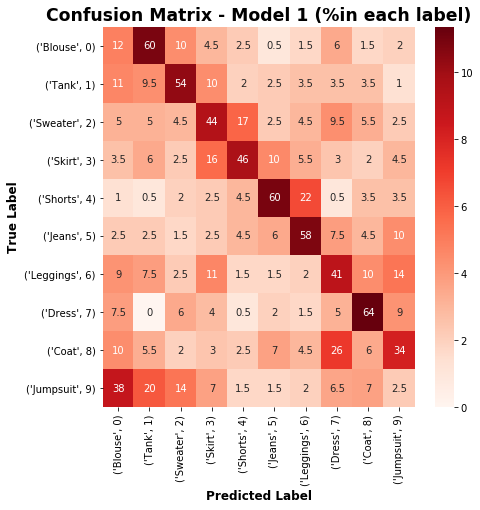

In [85]:
#### Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

figsize(7, 7)
plot_confusion('Confusion Matrix - Model 1 (%in each label)',y_true,y_pred)# Adding 1 to y_pred as our labels/catgories start from1

In [86]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: %.3f"% accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

Accuracy: 0.068
             precision    recall  f1-score   support

          0       0.12      0.12      0.12       200
          1       0.08      0.10      0.09       200
          2       0.05      0.04      0.05       200
          3       0.15      0.16      0.16       200
          4       0.05      0.04      0.05       200
          5       0.06      0.06      0.06       200
          6       0.02      0.02      0.02       200
          7       0.05      0.05      0.05       200
          8       0.06      0.06      0.06       200
          9       0.03      0.03      0.03       200

avg / total       0.07      0.07      0.07      2000



### Shifting y_true labels by 2

In [87]:
y_new_true =[]
for i in range(len(y_true)):
    if y_true[i] >=9:
        y_new_true.append(y_true[i] - 9)
    else:
        y_new_true.append(y_true[i] + 1)
    

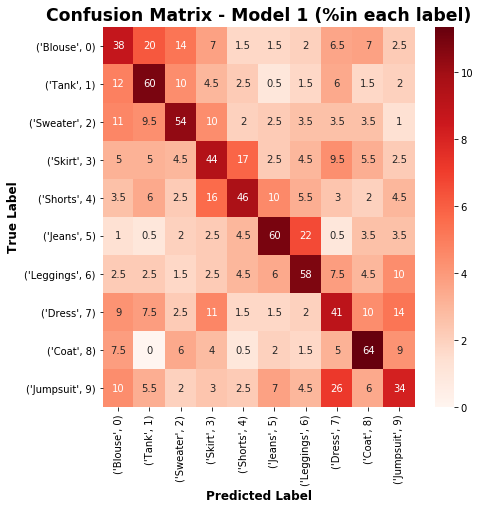

In [88]:
#### Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

figsize(7, 7)
plot_confusion('Confusion Matrix - Model 1 (%in each label)',y_new_true,y_pred)# Adding 1 to y_pred as our labels/catgories start from1

In [81]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: %.3f"% accuracy_score(y_new_true, y_pred))
print(classification_report(y_new_true, y_pred))

Accuracy: 0.460
             precision    recall  f1-score   support

          0       0.36      0.36      0.36       200
          1       0.50      0.57      0.53       200
          2       0.50      0.49      0.49       200
          3       0.38      0.40      0.39       200
          4       0.52      0.43      0.48       200
          5       0.57      0.54      0.55       200
          6       0.51      0.54      0.53       200
          7       0.33      0.36      0.35       200
          8       0.53      0.57      0.55       200
          9       0.41      0.34      0.37       200

avg / total       0.46      0.46      0.46      2000



### Model2: Inception V3 

**Change:**   ReduceLROnPlateau(factor=.2, patience=1, verbose=1)  
**Model1:**   ReduceLROnPlateau(factor=.5,patience=3)   

### Image Generator Pre-processing

In [81]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True,
    zca_epsilon=1e-6,
    horizontal_flip=True,
    rotation_range=15,  
    width_shift_range=4/200,
    height_shift_range=4/200,
    fill_mode='constant',
    cval=0.,
    data_format=K.image_data_format()
    )

test_datagen = ImageDataGenerator(rescale=1./255)

In [82]:
train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/Model_Train_Val_set/Train_Set',
        target_size=(200, 200), #image width & height
        batch_size=32,
        class_mode='categorical')

Found 8000 images belonging to 10 classes.


In [83]:
validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/Model_Train_Val_set/Test_Set',
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical',
        shuffle= False)

Found 2000 images belonging to 10 classes.


### Model Architecture

In [84]:
# create the base pre-trained model
base_model2 = InceptionV3(weights='imagenet', include_top=False)

In [85]:
# add a global spatial average pooling layer
x = base_model2.output
x = GlobalAveragePooling2D()(x)

In [86]:
#Classification Layers
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- 10 classes
predictions = Dense(10, activation='softmax')(x)

In [87]:
# this is the model we will train
model2 = Model(inputs=base_model2.input, outputs=predictions)

In [88]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model2.layers:
    layer.trainable = False

In [89]:
'''
# compile the model (should be done *after* setting layers to non-trainable)
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top_3])
'''

In [90]:
model2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_189 (Conv2D)              (None, None, None, 32 864         input_3[0][0]                    
____________________________________________________________________________________________________
batch_normalization_189 (BatchNo (None, None, None, 32 96          conv2d_189[0][0]                 
____________________________________________________________________________________________________
activation_189 (Activation)      (None, None, None, 32 0           batch_normalization_189[0][0]    
___________________________________________________________________________________________

## Train Model on Base Model ---Train Top Layers

#### Train the model on the new data for a few epochs
model.fit_generator(...)

Epoch 1/100


/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:506: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:514: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:524: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


250/250 [==============================] - 71s - loss: 2.4567 - acc: 0.2041 - top_3: 0.4681 - val_loss: 2.0102 - val_acc: 0.2865 - val_top_3: 0.5635
Epoch 2/100
250/250 [==============================] - 69s - loss: 2.0034 - acc: 0.2990 - top_3: 0.5879 - val_loss: 1.9892 - val_acc: 0.2865 - val_top_3: 0.5845
Epoch 3/100
250/250 [==============================] - 69s - loss: 1.9318 - acc: 0.3241 - top_3: 0.6200 - val_loss: 1.8689 - val_acc: 0.3315 - val_top_3: 0.6320
Epoch 4/100
250/250 [==============================] - 68s - loss: 1.8767 - acc: 0.3416 - top_3: 0.6428 - val_loss: 1.9347 - val_acc: 0.3045 - val_top_3: 0.6040
Epoch 5/100
249/250 [============================>.] - ETA: 0s - loss: 1.8494 - acc: 0.3552 - top_3: 0.6527
Epoch 00004: reducing learning rate to 0.00020000000949949026.
250/250 [==============================] - 69s - loss: 1.8476 - acc: 0.3559 - top_3: 0.6531 - val_loss: 1.9253 - val_acc: 0.3305 - val_top_3: 0.6320
Epoch 6/100
250/250 [===========================

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


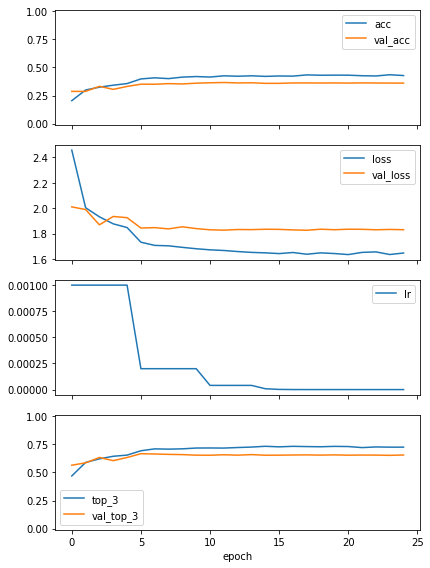

In [91]:
'''
%%time

#old model with less layers architecture..running throuh extra preprocessing steps from directory-- loss starts at 2
hist21 = model2.fit_generator(
        train_generator,
        steps_per_epoch=8000/32,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=2000/ 32,
        callbacks=[keras.callbacks.EarlyStopping(patience=6,verbose=1),
        keras.callbacks.ReduceLROnPlateau(factor=.2, patience=1, verbose=1)])


plot_history(hist21)
'''

In [92]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model2.layers):
    print(i, layer.name)

0 input_3
1 conv2d_189
2 batch_normalization_189
3 activation_189
4 conv2d_190
5 batch_normalization_190
6 activation_190
7 conv2d_191
8 batch_normalization_191
9 activation_191
10 max_pooling2d_9
11 conv2d_192
12 batch_normalization_192
13 activation_192
14 conv2d_193
15 batch_normalization_193
16 activation_193
17 max_pooling2d_10
18 conv2d_197
19 batch_normalization_197
20 activation_197
21 conv2d_195
22 conv2d_198
23 batch_normalization_195
24 batch_normalization_198
25 activation_195
26 activation_198
27 average_pooling2d_19
28 conv2d_194
29 conv2d_196
30 conv2d_199
31 conv2d_200
32 batch_normalization_194
33 batch_normalization_196
34 batch_normalization_199
35 batch_normalization_200
36 activation_194
37 activation_196
38 activation_199
39 activation_200
40 mixed0
41 conv2d_204
42 batch_normalization_204
43 activation_204
44 conv2d_202
45 conv2d_205
46 batch_normalization_202
47 batch_normalization_205
48 activation_202
49 activation_205
50 average_pooling2d_20
51 conv2d_201
52 

In [93]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model2.layers[:249]:
   layer.trainable = False
for layer in model2.layers[249:]:
   layer.trainable = True

In [94]:
'''
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model2.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy', top_3])
'''

Epoch 1/100


/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:506: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:514: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.5/dist-packages/Keras-2.0.8-py3.5.egg/keras/preprocessing/image.py:524: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


250/250 [==============================] - 75s - loss: 1.6345 - acc: 0.4336 - top_3: 0.7316 - val_loss: 1.8134 - val_acc: 0.3680 - val_top_3: 0.6640
Epoch 2/100
250/250 [==============================] - 73s - loss: 1.6183 - acc: 0.4369 - top_3: 0.7394 - val_loss: 1.7959 - val_acc: 0.3760 - val_top_3: 0.6695
Epoch 3/100
250/250 [==============================] - 73s - loss: 1.5855 - acc: 0.4480 - top_3: 0.7517 - val_loss: 1.7782 - val_acc: 0.3810 - val_top_3: 0.6770
Epoch 4/100
250/250 [==============================] - 73s - loss: 1.5709 - acc: 0.4534 - top_3: 0.7540 - val_loss: 1.7762 - val_acc: 0.3765 - val_top_3: 0.6825
Epoch 5/100
250/250 [==============================] - 73s - loss: 1.5506 - acc: 0.4657 - top_3: 0.7574 - val_loss: 1.7700 - val_acc: 0.3850 - val_top_3: 0.6765
Epoch 6/100
250/250 [==============================] - 73s - loss: 1.5199 - acc: 0.4743 - top_3: 0.7649 - val_loss: 1.7627 - val_acc: 0.3835 - val_top_3: 0.6730
Epoch 7/100
250/250 [=========================

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


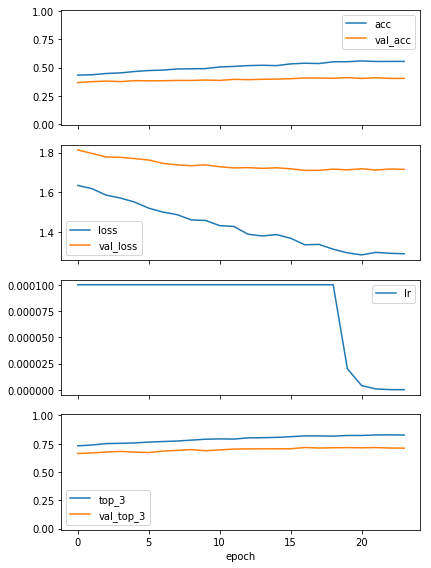

In [95]:
'''
%%time
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
hist22 = model2.fit_generator(train_generator,
        steps_per_epoch=8000/32,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=2000/ 32,
        callbacks=[keras.callbacks.EarlyStopping(patience=6,verbose=1),
        keras.callbacks.ReduceLROnPlateau(factor=.2, patience=1, verbose=1)]) #factor=.2, patience=1, verbose=1


plot_history(hist22)
'''

## Predicted Y  label

#### Model Predicted probabilities for the 10 classes  and Highest Predicted Class for each example

**Important Note:**  Make validation_generator's shuffle argument False but keep the train_generator Shuffle as false

In [96]:
%%time

predictions_class_prob2= model2.predict_generator(validation_generator, steps=2000/32)


CPU times: user 16.9 s, sys: 468 ms, total: 17.4 s
Wall time: 14 s


In [97]:
print('Probabilities for each class:\n')
predictions_class_prob2

Probabilities for each class:



array([[ 0.08677566,  0.01440107,  0.02966605, ...,  0.61014473,
         0.02656436,  0.05604092],
       [ 0.06514508,  0.00667973,  0.0717471 , ...,  0.10361957,
         0.1409191 ,  0.5302847 ],
       [ 0.12613501,  0.09674411,  0.28839514, ...,  0.18143263,
         0.07353709,  0.02933252],
       ..., 
       [ 0.00512721,  0.00119507,  0.00155759, ...,  0.92321229,
         0.01404501,  0.03868209],
       [ 0.17813954,  0.11676957,  0.14151661, ...,  0.08750954,
         0.15992235,  0.01374832],
       [ 0.011459  ,  0.00176176,  0.02439721, ...,  0.66285646,
         0.05542687,  0.21169971]], dtype=float32)

In [98]:
predictions_class_prob2[2]

array([ 0.12613501,  0.09674411,  0.28839514,  0.16600397,  0.01888015,
        0.01072254,  0.00881669,  0.18143263,  0.07353709,  0.02933252], dtype=float32)

In [99]:
# Class with highest predicted probability for each example
y_pred = np.argmax(predictions_class_prob2, axis=1)

In [100]:
print('Predicted Labels:\n')
y_pred

Predicted Labels:



array([7, 9, 2, ..., 7, 3, 7])

### -----> Issue finding True y label

validation_generator.classes does print the True labels but in the order that they are retrieved from the directory, it doesn't take into account the batching or sample expansion by augmentation.
https://q-a-assistant.info/computer-internet-technology/keras-get-true-labels-y-test-from-imagedatagenerator-or-predict-generator/1165857

In [101]:
y_true = validation_generator.classes  # True Lable

In [102]:
y_true 

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [103]:
validation_generator.filenames

['Cat0/Floral_Print_Peasant_Blouse+img_00000113.jpg',
 'Cat0/Textured_High-Neck_Blouse+img_00000062.jpg',
 'Cat0/Embroidered_Mesh_Gauze_Blouse+img_00000088.jpg',
 'Cat0/Speckled_Slub_Knit_Blouse+img_00000079.jpg',
 'Cat0/Eyelash_Lace-Paneled_Blouse+img_00000060.jpg',
 'Cat0/Butterfly_Print_Blouse+img_00000057.jpg',
 'Cat0/Baroque_Print_Blouse+img_00000074.jpg',
 'Cat0/Woven_Chelsea_Collar_Blouse+img_00000087.jpg',
 'Cat0/Floral_Printed_Side-Tie_Blouse+img_00000048.jpg',
 'Cat0/Metallic_Polka_Dot_Blouse+img_00000044.jpg',
 'Cat0/Boxy_Angel-Sleeved_Blouse+img_00000069.jpg',
 'Cat0/Floral_Flutter_Sleeve_Blouse+img_00000039.jpg',
 'Cat0/Lace-Paneled_Georgette_Blouse+img_00000019.jpg',
 'Cat0/Side-Slit_Collared_Blouse+img_00000094.jpg',
 'Cat0/Collared_Surplice_Blouse+img_00000074.jpg',
 'Cat0/Classic_Crocheted_Lace_Blouse+img_00000083.jpg',
 'Cat0/Abstract_Daisy_Print_Blouse+img_00000009.jpg',
 'Cat0/Cap-Sleeved_Lace_Blouse+img_00000068.jpg',
 'Cat0/Classic_Crocheted_Lace_Blouse+img_000000

In [104]:
validation_generator.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [105]:
validation_generator.class_indices

{'Cat0': 0,
 'Cat1': 1,
 'Cat2': 2,
 'Cat3': 3,
 'Cat4': 4,
 'Cat5': 5,
 'Cat6': 6,
 'Cat7': 7,
 'Cat8': 8,
 'Cat9': 9}

In [106]:
import seaborn as sns

In [107]:
label_dict ={'Sweater': 4, 'Jacket': 6, 'Skirt': 7, \
 'Tank': 2, 'Shorts': 8, 'Blouse': 0, \
 'Cardigan': 5, 'Top': 3, 'Dress': 9, 'Tee': 1}

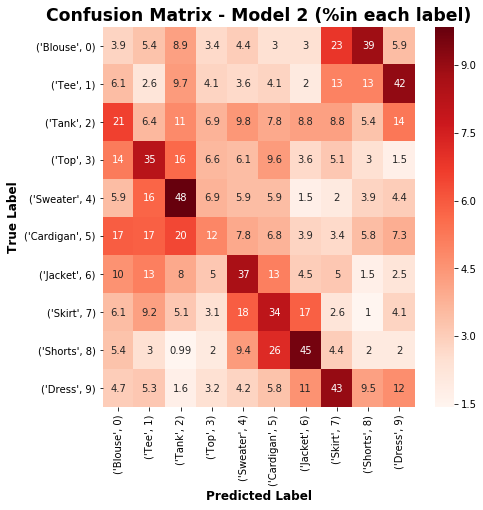

In [108]:
#### Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

figsize(7, 7)
plot_confusion('Confusion Matrix - Model 2 (%in each label)',y_true,y_pred)# Adding 1 to y_pred as our labels/catgories start from1

In [109]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: %.3f"% accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

Accuracy: 0.058
             precision    recall  f1-score   support

          0       0.04      0.04      0.04       203
          1       0.02      0.03      0.02       196
          2       0.09      0.11      0.10       204
          3       0.12      0.07      0.09       197
          4       0.06      0.06      0.06       204
          5       0.06      0.07      0.06       206
          6       0.04      0.04      0.04       201
          7       0.02      0.03      0.02       196
          8       0.02      0.02      0.02       203
          9       0.12      0.12      0.12       190

avg / total       0.06      0.06      0.06      2000



### Shifting y_true labels by 2

In [110]:
y_new_true =[]
for i in range(len(y_true)):
    if y_true[i] >=2:
        y_new_true.append(y_true[i] - 2)
    else:
        y_new_true.append(y_true[i] + 8)
    

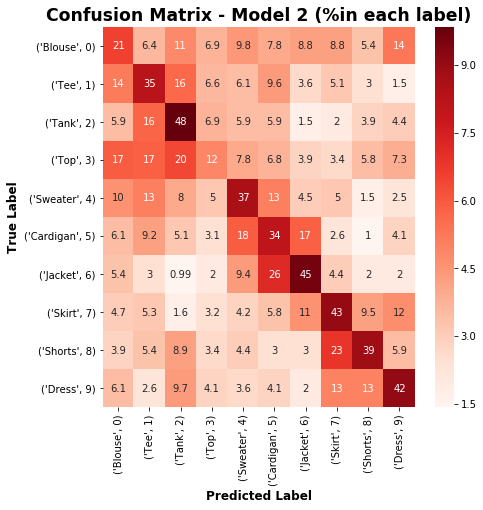

In [111]:
#### Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

figsize(7, 7)
plot_confusion('Confusion Matrix - Model 2 (%in each label)',y_new_true,y_pred)# Adding 1 to y_pred as our labels/catgories start from1

In [112]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: %.3f"% accuracy_score(y_new_true, y_pred))
print(classification_report(y_new_true, y_pred))

Accuracy: 0.354
             precision    recall  f1-score   support

          0       0.23      0.21      0.22       204
          1       0.30      0.35      0.32       197
          2       0.37      0.48      0.42       204
          3       0.23      0.12      0.15       206
          4       0.35      0.37      0.36       201
          5       0.29      0.34      0.31       196
          6       0.46      0.45      0.45       203
          7       0.38      0.43      0.40       190
          8       0.47      0.39      0.43       203
          9       0.44      0.42      0.43       196

avg / total       0.35      0.35      0.35      2000



### Saving & Loading the model  

save a Keras model into a single HDF5 file which will contain:  

the architecture of the model, allowing to re-create the model  
the weights of the model  
the training configuration (loss, optimizer)  
the state of the optimizer, allowing to resume training exactly where you left off.  

In [114]:
'''
model2.save('/home/ubuntu/data/modelInception_2.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
'''

In [116]:
# returns a compiled model
# identical to the previous one
model2 = load_model('/home/ubuntu/data/modelInception_2.h5',\
                    custom_objects={'top_3': top_3})